In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

data,y = make_blobs(n_samples=2000,n_features=2,random_state=0,cluster_std=0.5)

In [3]:
data.shape

(2000, 2)

In [4]:
centroids = data[np.random.choice(range(data.shape[0]),size=(4,))]
centroids

array([[-1.46484487,  3.83642261],
       [ 3.39555294,  0.7972594 ],
       [ 1.20783524,  4.44333521],
       [ 1.67210372,  1.53841933]])

[]

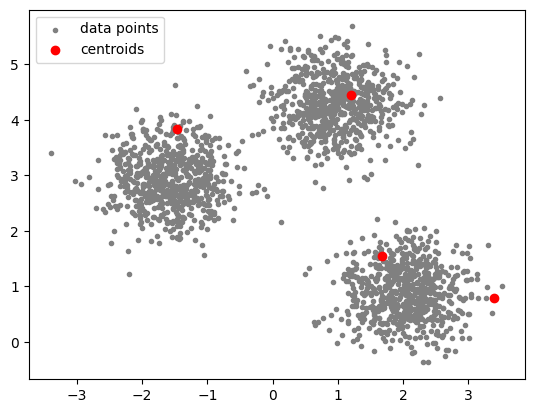

In [5]:
plt.scatter(data[:,0],data[:,1],marker='.',color='grey',label='data points')
plt.scatter(centroids[:,0],centroids[:,1],color='red',label='centroids')
plt.legend()
plt.plot()

In [6]:
((data[0]-centroids[0])**2)**0.5

array([0.11930267, 0.79272522])

In [7]:
data.shape,centroids.shape

((2000, 2), (4, 2))

In [8]:
(((data-centroids[0])**2).sum(axis=1))**0.5

array([0.80165229, 0.55474632, 2.38538724, ..., 2.79095588, 2.23824243,
       3.00821835])

In [11]:
def euclidian(x,centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = (((x - centroid)**2).sum(axis=1)**0.5).reshape(-1,1)
        dist = np.hstack([dist,distance])
    return dist

In [12]:
# assign_c = np.argmin(dist,axis=1)
# pd.Series(assign_c).value_counts()

In [14]:
# data[assign_c==0].mean(axis=0)

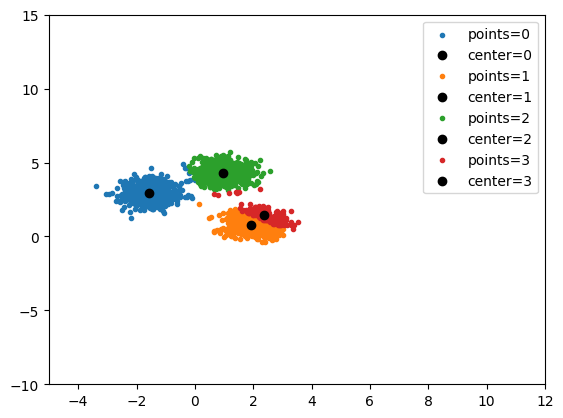

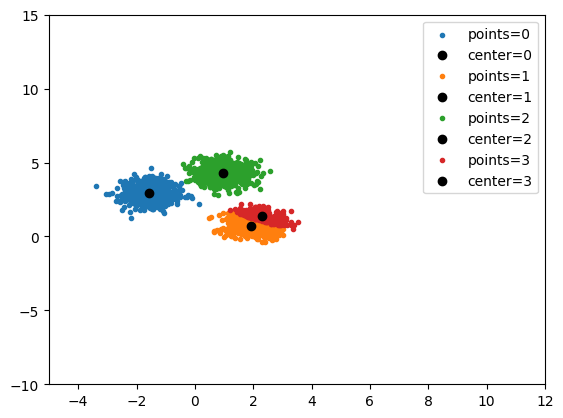

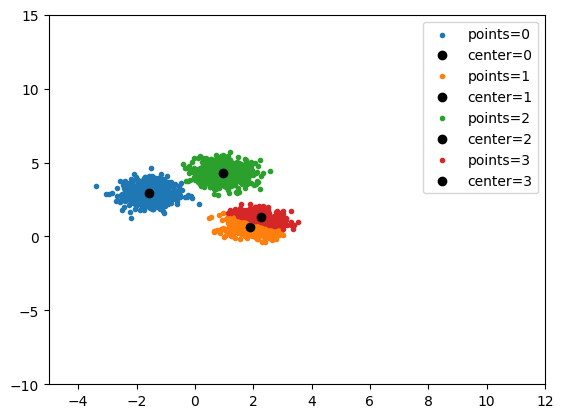

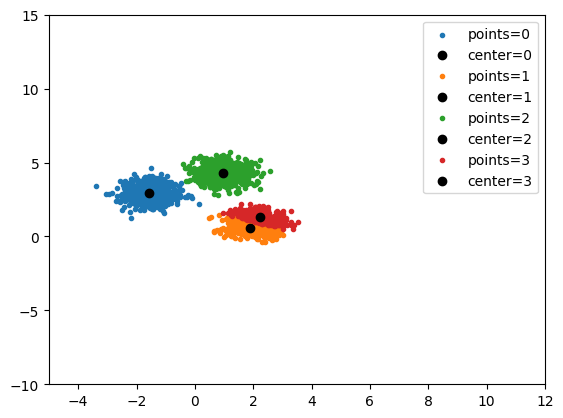

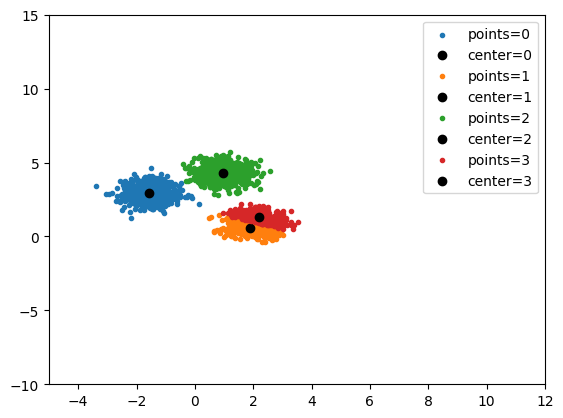

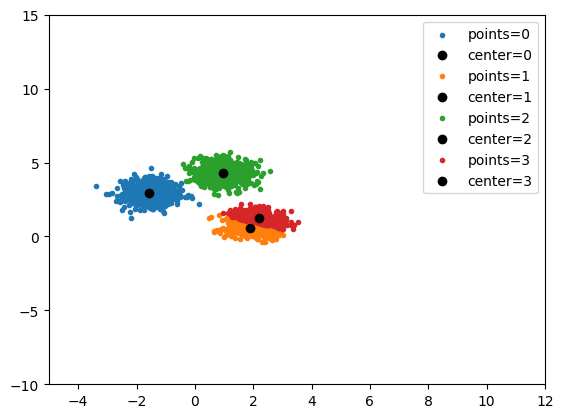

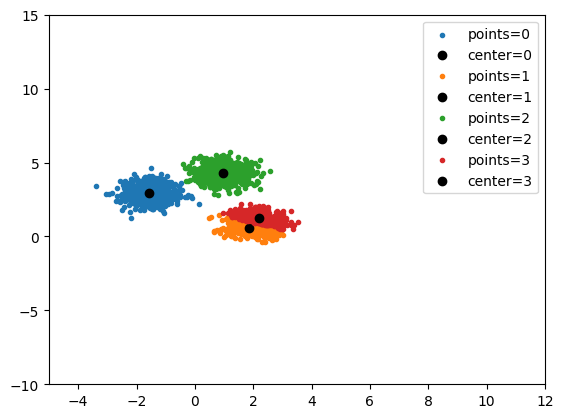

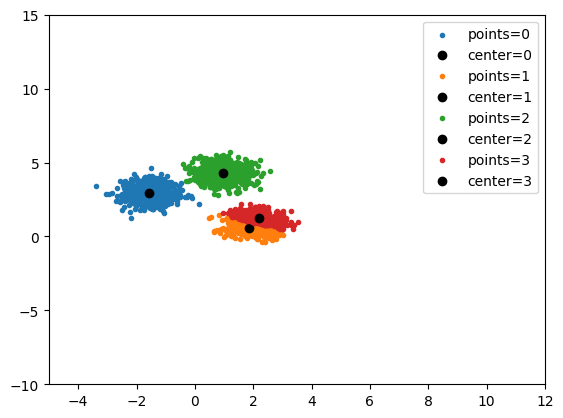

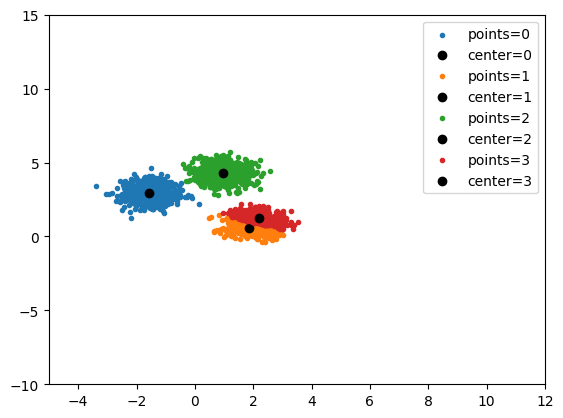

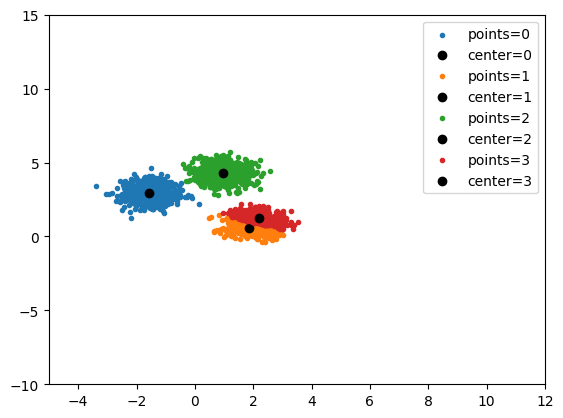

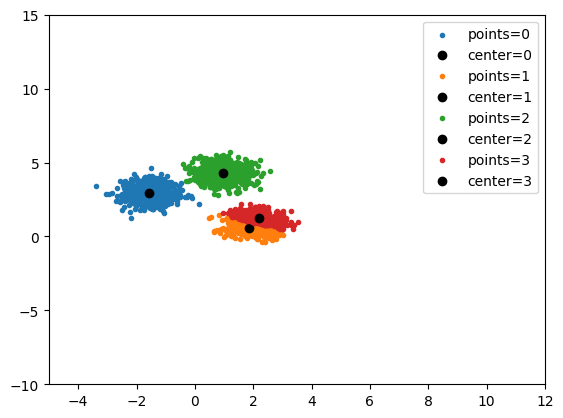

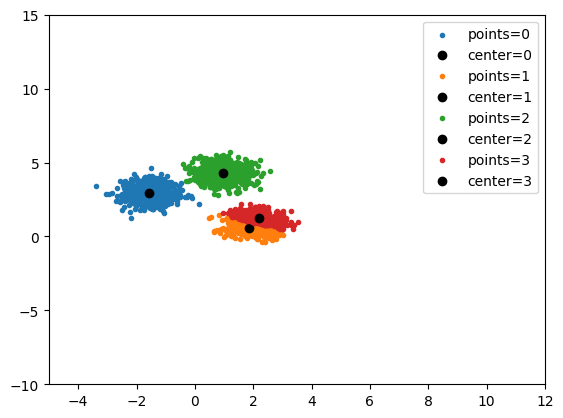

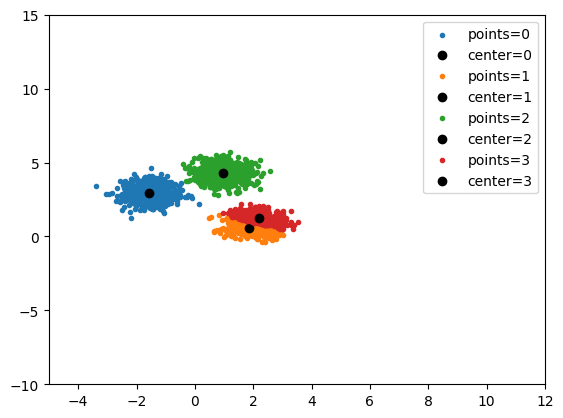

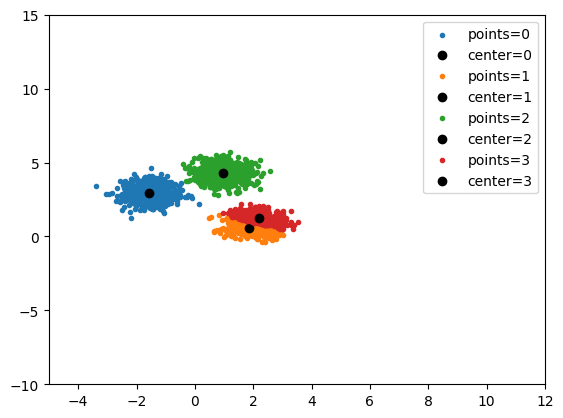

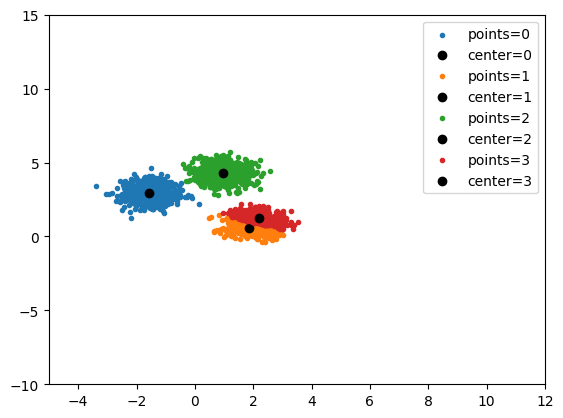

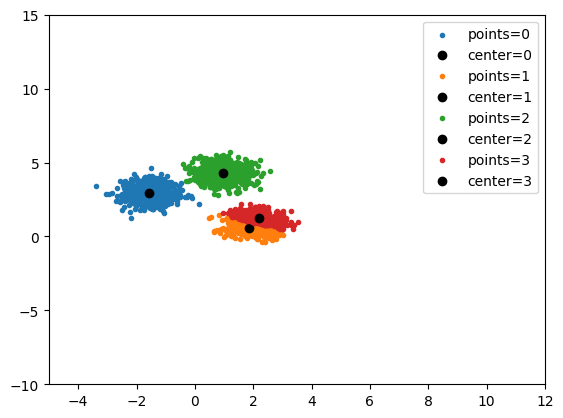

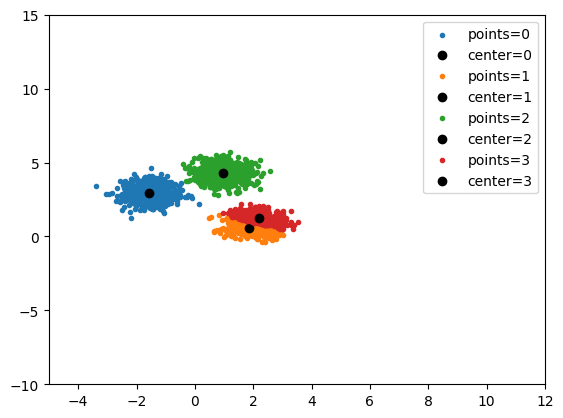

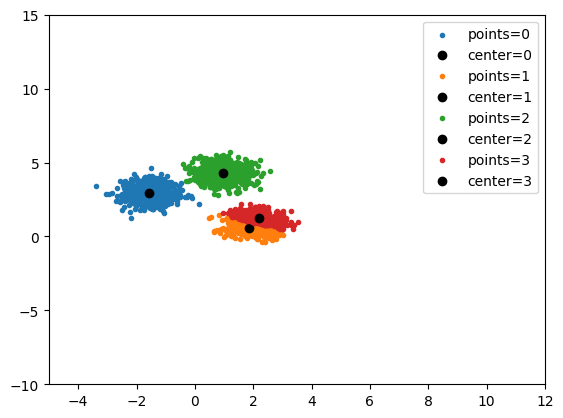

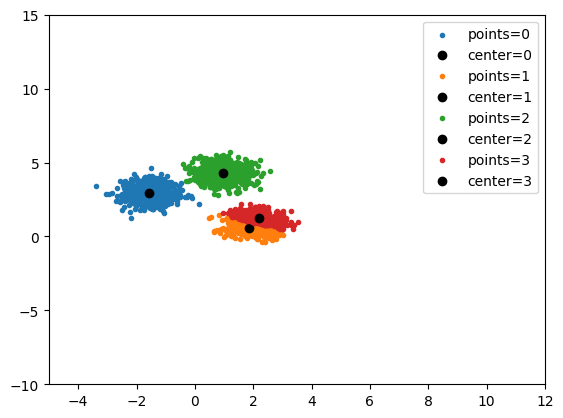

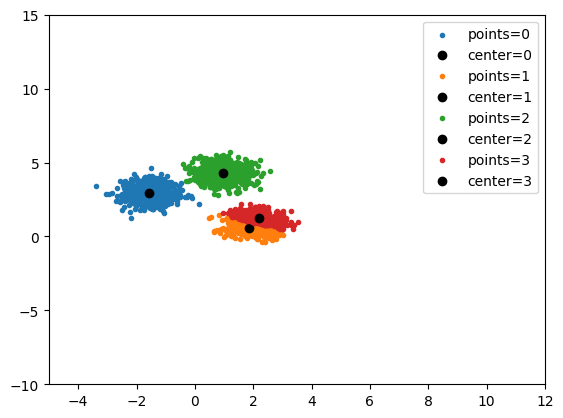

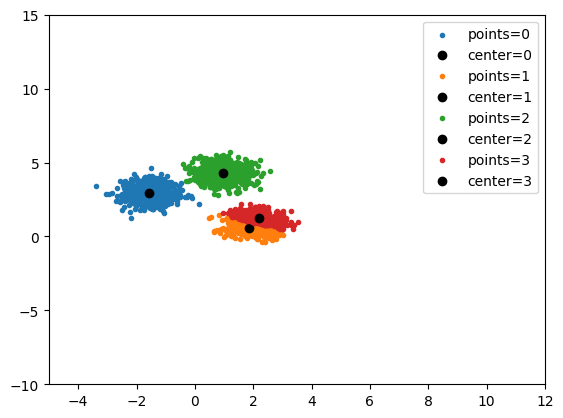

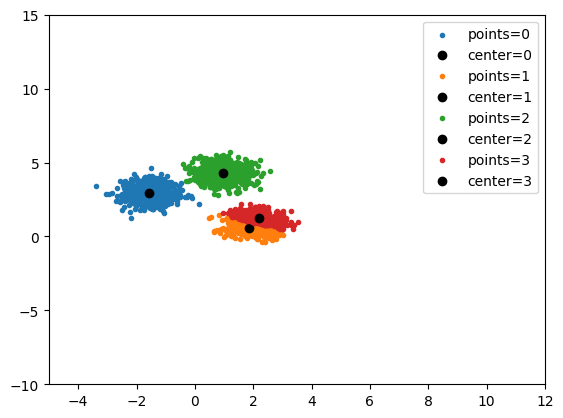

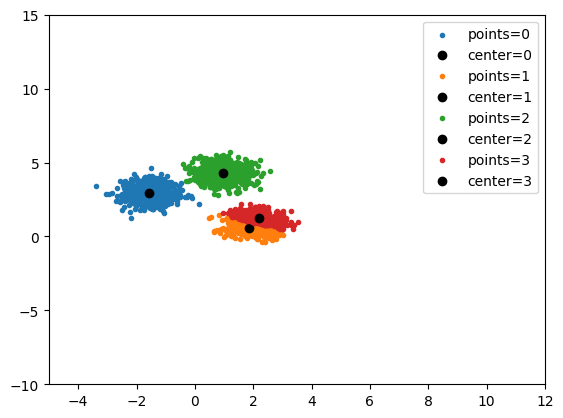

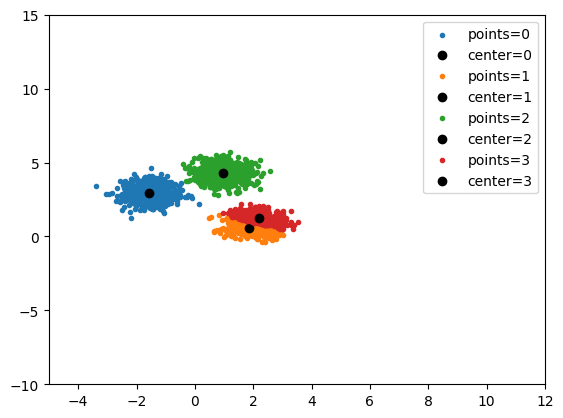

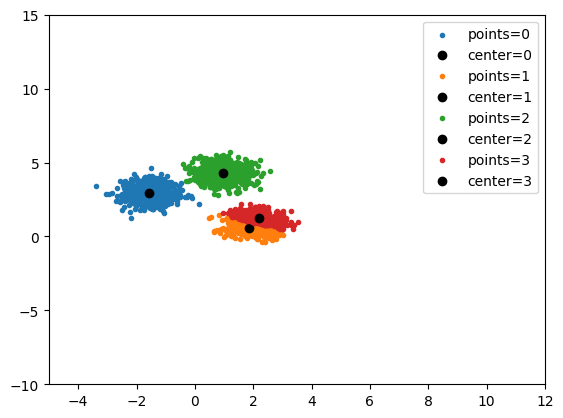

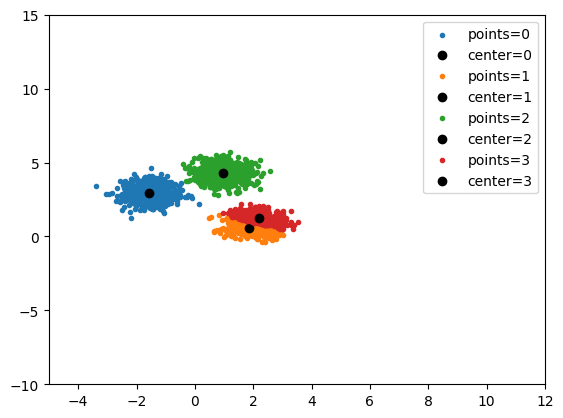

In [15]:
# intialize centroids
centroids = data[np.random.choice(range(data.shape[0]),size=(4,))]

# create a list to store centroids
assigned_centroids = np.zeros(len(data),dtype=np.int32)

def get_close_centroids(x,centroids):
    # loop over each centroids and compute the distances
    dist = euclidian(x,centroids)
    
    # Get the index of centroids with smallest distance to data point
    closest_centroid_index = np.argmin(dist,axis=1)
    return closest_centroid_index

n_iter = 26
for n in range(n_iter):
    closest_centroid = get_close_centroids(data,centroids)
    assigned_centroids = closest_centroid
    # loop over centrods and find new onces
    for c in range(len(centroids)):
        cluster_data = data[assigned_centroids==c]
        new_centroids = cluster_data.mean(axis=0)
        centroids[c] = new_centroids
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [16]:
def euclidian(x,centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = (((x - centroid)**2).sum(axis=1)**0.5).reshape(-1,1)
        dist = np.hstack([dist,distance])
    return dist

def calculate_wcss(data,centroids,assigned_centroids):
    # calculating distance within centroids
    wcss = 0
    for c in range(len(centroids)):
        wcss+=np.sum((data[assigned_centroids==c]-centroids[c])**2)
        return wcss
    
def get_close_centroids(x,centroids):
    # loop over each centroids and compute the distances
    dist = euclidian(x,centroids)
    
    # Get the index of centroids with smallest distance to data point
    closest_centroid_index = np.argmin(dist,axis=1)
    return closest_centroid_index

def update_centroids(data,assigned_centroids,centroids):
    for c in range(len(centroids)):
        # getting the data belongs to one clsuter
        cluster_data = data[assigned_centroids==c]
        # calculating new mean for centroids update.
        new_centroid = cluster_data.mean(axis=0)
        #assgning the new centroid
        centroids[c] = new_centroid
    return centroids


def k_mean_algo(num_clusters):
    centroids = data[np.random.choice(range(data.shape[0]),size=(num_clusters,))]
    
    assigned_centroids = np.zeros(len(data),dtype=np.int32)
    n_iter = 23
    for n in range(n_iter):
        closest_centroids = get_close_centroids(data,centroids)
        
        assigned_centroids = closest_centroids
        
        centroids = update_centroids(data,assigned_centroids,centroids)
    wcss = calculate_wcss(data,centroids,assigned_centroids)
    
    return wcss

In [17]:
list_wcss=[]
for i in range(1,10):
    list_wcss.append(k_mean_algo(i))
list_wcss

[9374.471402524703,
 3392.283838738388,
 318.76925245800714,
 315.9473117150371,
 42.744266484326836,
 45.26477315940744,
 31.63994312015443,
 21.446893256770846,
 58.97541415015102]

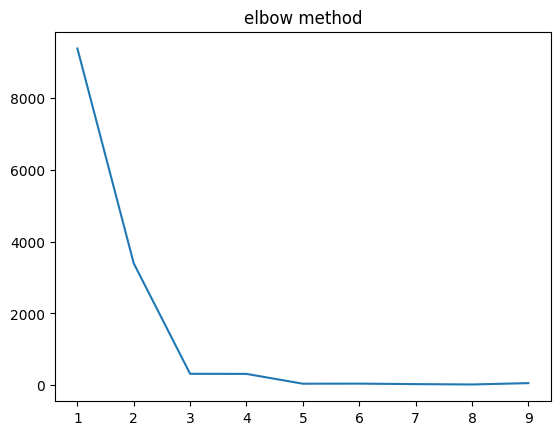

In [20]:
plt.title('elbow method')
plt.plot(list(range(1,10)),list_wcss)
plt.show()